## Real estate price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# housing.head()

In [4]:
# housing.info()

In [5]:
# housing["CHAS"].value_counts()

In [6]:
# housing.describe()

In [7]:
%matplotlib inline

In [8]:
# #for plotting histogram
# import matplotlib as plt
# housing.hist(bins = 50, figsize=(20,15))

## Train-test splitting

In [9]:
# #For learning purpose
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing,0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set: 404 
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
esp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in esp.split(housing,housing.CHAS):
    strata_train_set = housing.loc[train_index]
    strata_test_set = housing.loc[test_index]

In [14]:
# strata_test_set['CHAS'].value_counts()

In [15]:
# strata_train_set["CHAS"].value_counts()

In [16]:
housing = strata_train_set.copy()

## looking for correlation

In [17]:
# corr_matrix = housing.corr()
# corr_matrix["MEDV"].sort_values(ascending=False)


array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

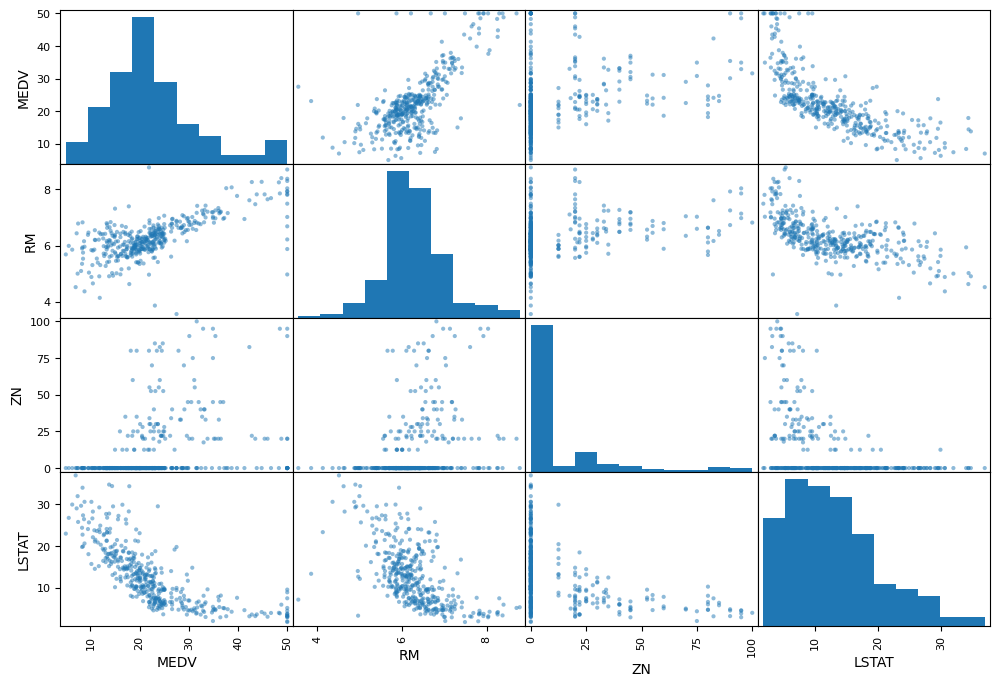

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV",'RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

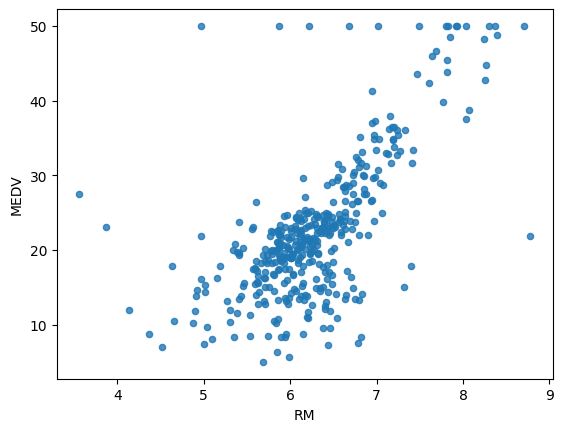

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinatins

In [20]:
# housing['TAXRM']= housing['TAX']/housing['RM']
# housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
# corr_matrix = housing.corr()
# corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.681177
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523921
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

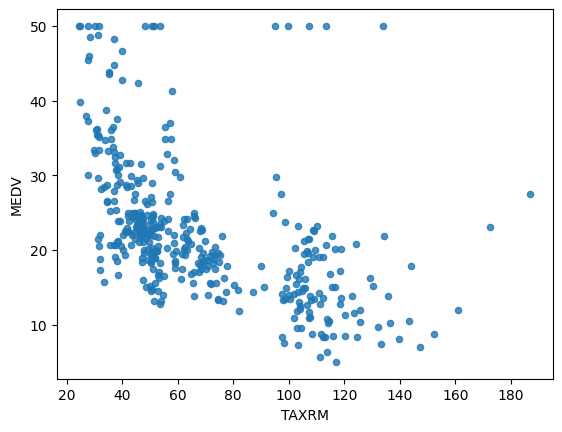

In [22]:
# housing.plot(kind='scatter', x='TAXRM', y='MEDV',alpha=0.8)

In [23]:
housing = strata_train_set.drop("MEDV",axis=1)
housing_labels = strata_train_set["MEDV"].copy()
# housing
# housing_labels

## Missing Attributes

In [24]:
# To take care of Missing attributes we have three options:
#     1.Get rid of the missing data points
#     2.Get rid of the whole attributes
#     3.Set the value to some value(0, mean or median)

In [25]:
a = housing.dropna(subset='RM')  #Option 1
a.shape

(400, 13)

In [26]:
housing.drop("RM",axis=1).shape   #Option 2
# Note that there is no RM column and also Note that original housing dataframe will remain unchanged

(404, 12)

In [27]:
median = housing['RM'].median() #Compute median for Option 3

In [28]:
housing['RM'].fillna(median) #Option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
# housing.shape

In [30]:
housing.describe()  #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280303,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715986,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
x = imputer.transform(housing)
x.shape

(404, 13)

In [34]:
housing_tr = pd.DataFrame(x,columns=housing.columns)
# housing_tr

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279606,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712458,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects

1.Estimators --> It estimates some parameters based on dataset.( Eg.Imputer)
                 It has a fit method and transform method. 
Fit method-> Fits the datasets and calculate internal parameters
  
2.Transformers--> transform method takes input and return output based on the learnings from fit(). It also has a convinience function called fit_transform() which fits and then transforms.

3.predictors--> LinearRegression model is an example of a predictor. fit() and predict() are two common function.It also gives score function which will evaluate the predictions.

## Feature Scaling

primarily, two types of feature scalling method:

1.Min-max scalling (Normalizaiton):
      (value - min)/(max - min)
      sklearn provides a class called MinMaxScaller for this
      
2.Standardization:
      (value - mean)/std
      sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
  #......I can add as many as i want in my pipeline
    ('std_scaler', StandardScaler())
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired model for Real Estates

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.312, 25.878, 16.204, 23.387, 23.311])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [45]:
rmse

1.2020520542343858

## Using better evaluation technique - Cross validation

In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-score)

In [47]:
rmse_score

array([2.75234869, 2.81441737, 4.58979094, 2.48387648, 3.20686387,
       2.62834296, 4.74087984, 3.28766424, 3.30947394, 3.25474199])

In [48]:
def print_scores(score):
    print("scores ", score)
    print("mean ", score.mean())
    print("Standard deviation ", score.std())

In [49]:
print_scores(rmse_score)

scores  [2.75234869 2.81441737 4.58979094 2.48387648 3.20686387 2.62834296
 4.74087984 3.28766424 3.30947394 3.25474199]
mean  3.3068400322711513
Standard deviation  0.7350568221312015


## Saving the model

In [50]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [55]:
x_test = strata_test_set.drop("MEDV", axis=1)
y_test = strata_test_set["MEDV"].copy()
x_test_prep = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prep)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
# print(final_prediction,list(y_test))

In [52]:
final_rmse

2.8744518300937663

In [53]:
final_mse

8.262473323529402

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24116401, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])